In [1]:
import os
from pathlib import Path
import pandas as pd
df = pd.read_csv("dataset.csv", low_memory=False)

In [2]:
print(df.shape)

(692703, 85)


In [3]:
print(df.head(5))

                                  Flow ID      Source IP   Source Port  \
0  192.168.10.14-209.48.71.168-49459-80-6  192.168.10.14         49459   
1  192.168.10.3-192.168.10.17-389-49453-6  192.168.10.17         49453   
2   192.168.10.3-192.168.10.17-88-46124-6  192.168.10.17         46124   
3  192.168.10.3-192.168.10.17-389-49454-6  192.168.10.17         49454   
4   192.168.10.3-192.168.10.17-88-46126-6  192.168.10.17         46126   

   Destination IP   Destination Port   Protocol      Timestamp  \
0   209.48.71.168                 80          6  5/7/2017 8:42   
1    192.168.10.3                389          6  5/7/2017 8:42   
2    192.168.10.3                 88          6  5/7/2017 8:42   
3    192.168.10.3                389          6  5/7/2017 8:42   
4    192.168.10.3                 88          6  5/7/2017 8:42   

    Flow Duration   Total Fwd Packets   Total Backward Packets   ...    \
0           38308                   1                        1   ...     
1         

In [4]:
print(list(df.columns.values))

['Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', 

In [5]:
for column_name in df.columns:
    if df[column_name].dtypes=='object':
        a=df[column_name].unique()
        a= len(a)
        print(column_name+" has "+str(a)+" unique values.")

Flow ID has 226768 unique values.
 Source IP has 7689 unique values.
 Destination IP has 9012 unique values.
 Timestamp has 509 unique values.
Flow Bytes/s has 450842 unique values.
 Flow Packets/s has 387031 unique values.
 Label has 6 unique values.


In [6]:
y = df[" Label"]
X = df.drop(["Flow ID"," Label", " Source IP"," Destination IP", " Timestamp", "Flow Bytes/s"," Flow Packets/s" ],1)

print(X.head(5))
print(y.head(5))


    Source Port   Destination Port   Protocol   Flow Duration  \
0         49459                 80          6           38308   
1         49453                389          6             479   
2         46124                 88          6            1095   
3         49454                389          6           15206   
4         46126                 88          6            1092   

    Total Fwd Packets   Total Backward Packets  Total Length of Fwd Packets  \
0                   1                        1                            6   
1                  11                        5                          172   
2                  10                        6                         3150   
3                  17                       12                         3452   
4                   9                        6                         3150   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                           6.0                       6   
1               

In [7]:
#Encode target values and convert to one hot encoding.
import numpy as np
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_y)

Using TensorFlow backend.


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=1)

In [9]:
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(519527,)
(519527, 78)
(173176,)
(173176, 78)


In [10]:
print(X_train.head(5))

print('-----------------')
print(df[' Label'].value_counts())

         Source Port   Destination Port   Protocol   Flow Duration  \
451289         56043                443          6          181103   
107684         50328                 80          6            2368   
62920          16182                443          6       116324083   
382089         51866                 53         17           80427   
192370         52072                 80          6        85638973   

         Total Fwd Packets   Total Backward Packets  \
451289                   7                        5   
107684                   3                        4   
62920                  141                      193   
382089                   4                        2   
192370                   8                        5   

        Total Length of Fwd Packets   Total Length of Bwd Packets  \
451289                          376                        3508.0   
107684                          311                       11595.0   
62920                          3134      

In [11]:
from sklearn.linear_model import SGDClassifier
import timeit

sgd_clf = SGDClassifier(random_state=42)
tic = timeit.default_timer()

sgd_clf.fit(X_train, y_train)
sgd_clf.predict(X_test)
toc = timeit.default_timer()-tic
print ("SGD Classifier train time in seconds: ",toc)

C:\Users\Amish\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGD Classifier train time in seconds:  10.065110984438627


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix,class_names,figsize=(5,3),fontsize=10):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return fig


CROSS VAL SCORE: 


C:\Users\Amish\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Amish\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

[ 0.8644335   0.84665978  0.86215519]


C:\Users\Amish\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Amish\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

CONFUSION MATRIX: 
[[291201   4064  28780    892   2773   2026]
 [  1820   5830     24     28      7      0]
 [ 29239     72 144221      5     45      0]
 [   602     48    430   2812    218      0]
 [  2546      1    166    109   1560      0]
 [     8      0      0      0      0      0]]


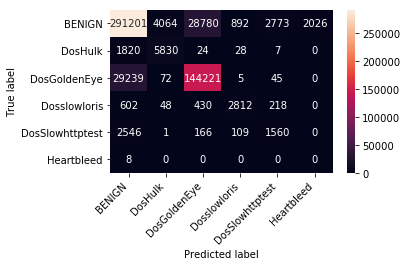

Precision Score: 
0.857749452868
Recall Score: 
0.857749452868
f1 score: 
0.857749452868


C:\Users\Amish\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Amish\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

In [13]:
#Confusion Matrix -> On y-axis, confusion matrix has the actual values, and on the x-axis, the values given by the predictor. Therefore, counts on the diagonal are number of correct predictions.

class_names = ['BENIGN','DosHulk','DosGoldenEye','Dosslowloris','DosSlowhttptest','Heartbleed']
from sklearn.model_selection import cross_val_score
print("CROSS VAL SCORE: ")
print(cross_val_score(sgd_clf, X_train, y_train,  scoring="accuracy"))

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix
print("CONFUSION MATRIX: ")
print(confusion_matrix(y_train, y_train_pred))
better_cf = print_confusion_matrix(confusion_matrix(y_train,y_train_pred), class_names)
from sklearn.metrics import precision_score, recall_score
print("Precision Score: ")
print(precision_score(y_train, y_train_pred, average='micro'))
print("Recall Score: ")
print(recall_score(y_train, y_train_pred, average='micro')) 

from sklearn.metrics import f1_score
print("f1 score: ")
print(f1_score(y_train, y_train_pred, average='micro'))
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")

 RandomForest train time in seconds:  30.954605549847713
[ 0.99921468  0.99937059  0.9992724 ]
CONFUSION MATRIX: 
[[329586      3    135      8      4      0]
 [    16   7680     10      3      0      0]
 [   118     14 173450      0      0      0]
 [    17      4      0   4075     14      0]
 [    18      1      1      4   4358      0]
 [     1      0      0      0      0      7]]


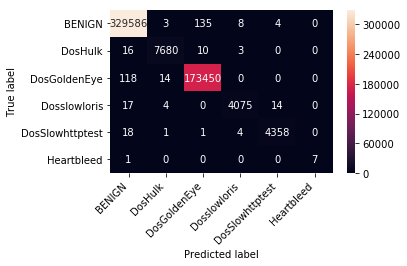

PRECISION SCORE: 
0.999285888895
RECALL SCORE: 
0.999285888895
F1 score: 
0.999285888895


In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
tic=timeit.default_timer()

rfc.fit(X_train, y_train)
rfc.predict(X_test)
toc=timeit.default_timer()-tic
print(" RandomForest train time in seconds: ",toc)

print(cross_val_score(rfc, X_train, y_train, cv=3, scoring="accuracy"))
y_probas_forest = cross_val_predict(rfc, X_train, y_train, cv=3, method="predict_proba")



y_train_pred = cross_val_predict(rfc, X_train, y_train, cv=3)
print("CONFUSION MATRIX: ")
print(confusion_matrix(y_train, y_train_pred))

better_cf = print_confusion_matrix(confusion_matrix(y_train,y_train_pred), class_names)

print("PRECISION SCORE: ")
print(precision_score(y_train, y_train_pred ,average='micro'))
print("RECALL SCORE: ")
print(recall_score(y_train, y_train_pred, average='micro')) 
print("F1 score: ")
print(f1_score(y_train, y_train_pred,average='micro'))


In [15]:
from sklearn.preprocessing import StandardScaler
StdSc= StandardScaler()

X_scaled= StdSc.fit_transform(X_train)
X_scaled_test = StdSc.fit_transform(X_test)
sgd_scaled = SGDClassifier(random_state=42)
tic=timeit.default_timer()

sgd_scaled.fit(X_scaled, y_train)
sgd_scaled.predict(X_scaled_test)
toc = timeit.default_timer()-tic
print(" SGD classifier with scaled values train time in seconds: ",toc)

C:\Users\Amish\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


 SGD classifier with scaled values train time in seconds:  8.180830281247097


In [16]:
y_scores = cross_val_predict(sgd_scaled, X_scaled, y_train, cv=3, method="decision_function")

C:\Users\Amish\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Amish\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

C:\Users\Amish\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Amish\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

[ 0.97856528  0.97928131  0.97688439]


C:\Users\Amish\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Amish\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

[[324097    204   5011    259    165      0]
 [  1494   5999    210      4      2      0]
 [  1760    124 171698      0      0      0]
 [   790     10    211   3072     27      0]
 [   807    106      9    102   3358      0]
 [     8      0      0      0      0      0]]


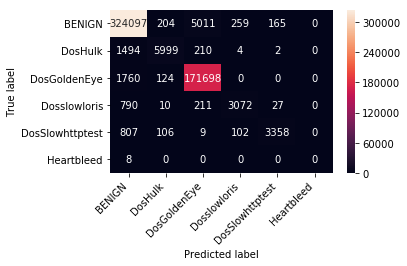

0.978243671647
0.978243671647
0.978243671647


C:\Users\Amish\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Amish\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

In [17]:
print(cross_val_score(sgd_scaled, X_scaled, y_train, cv=3, scoring="accuracy"))

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_scaled, X_scaled, y_train, cv=3)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))
better_cf = print_confusion_matrix(confusion_matrix(y_train,y_train_pred), class_names)

from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train, y_train_pred, average='micro'))
print(recall_score(y_train, y_train_pred, average='micro')) 

from sklearn.metrics import f1_score
print(f1_score(y_train, y_train_pred, average='micro'))
y_scores = cross_val_predict(sgd_scaled, X_scaled, y_train, cv=3, method="decision_function")

[ 0.99928397  0.99938791  0.99911649]
CONFUSION MATRIX: 
[[329514      2    206     12      2      0]
 [    12   7679     11      7      0      0]
 [    62     13 173507      0      0      0]
 [    16      3      0   4079     12      0]
 [    21      1      0      3   4357      0]
 [     0      0      0      0      0      8]]


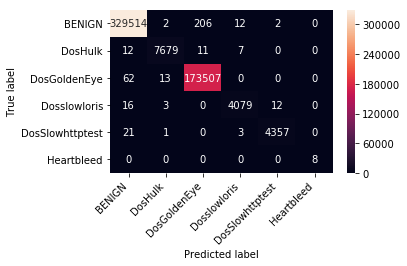

PRECISION SCORE: 
0.999262790962
RECALL SCORE: 
0.999262790962
F1 score: 
0.999262790962


In [18]:
#Random Forest after scaling:

rfc.fit(X_scaled, y_train)
rfc.predict(X_scaled_test)

print(cross_val_score(rfc, X_scaled, y_train, cv=3, scoring="accuracy"))
y_probas_forest = cross_val_predict(rfc, X_scaled, y_train, cv=3, method="predict_proba")

y_train_pred = cross_val_predict(rfc, X_scaled, y_train, cv=3)
print("CONFUSION MATRIX: ")
print(confusion_matrix(y_train, y_train_pred))

better_cf = print_confusion_matrix(confusion_matrix(y_train,y_train_pred), class_names)

print("PRECISION SCORE: ")
print(precision_score(y_train, y_train_pred ,average='micro'))
print("RECALL SCORE: ")
print(recall_score(y_train, y_train_pred, average='micro')) 
print("F1 score: ")
print(f1_score(y_train, y_train_pred,average='micro'))

LinearSVC classifier train time in seconds:  272.8157797127569
CONFUSION MATRIX: 
[[328131    102   1351    127      8     17]
 [   372   7279     48      8      1      1]
 [  1515      3 172061      0      0      3]
 [   158      2      0   3933     17      0]
 [   249      1      1     63   4068      0]
 [     1      0      0      0      0      7]]


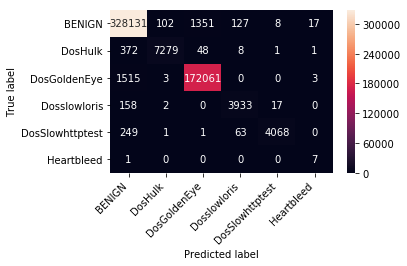

PRECISION SCORE: 
0.992208297163
RECALL SCORE: 
0.992208297163
F1 score: 
0.992208297163


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

StdSc= StandardScaler()

X_scaled= StdSc.fit_transform(X_train)
X_scaled_test = StdSc.fit_transform(X_test)
class_names = ['BENIGN','DosHulk','DosGoldenEye','Dosslowloris','DosSlowhttptest','Heartbleed']


import timeit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
])

tic=timeit.default_timer()

svm_clf.fit(X_scaled, y_train)

svm_clf.predict(X_scaled_test)
toc = timeit.default_timer()-tic
print("LinearSVC classifier train time in seconds: ",toc)
prediction = svm_clf.predict(X_scaled)
svm_clf.score(X_train, y_train)

#print(cross_val_score(rfc, X_scaled, y_train, cv=3, scoring="accuracy"))
y_train_pred = cross_val_predict(svm_clf, X_scaled, y_train, cv=3)
print("CONFUSION MATRIX: ")
print(confusion_matrix(y_train, y_train_pred))

better_cf = print_confusion_matrix(confusion_matrix(y_train,y_train_pred), class_names)

print("PRECISION SCORE: ")
print(precision_score(y_train, y_train_pred ,average='micro'))
print("RECALL SCORE: ")
print(recall_score(y_train, y_train_pred, average='micro')) 
print("F1 score: ")
print(f1_score(y_train, y_train_pred,average='micro'))

In [20]:
svm_clf.score(X_scaled_test, y_test)

0.99486071973021661

In [21]:
from sklearn.neighbors import KNeighborsClassifier 
tic = timeit.default_timer()
knn = KNeighborsClassifier(n_neighbors = 6).fit(X_scaled, y_train)
print(knn.predict(X_scaled_test))
toc = timeit.default_timer()-tic
print("KNN Classifier train time in seconds: ",toc)



['BENIGN' 'BENIGN' 'BENIGN' ..., 'BENIGN' 'BENIGN' 'BENIGN']
KNN Classifier train time in seconds:  1727.081527965985


In [22]:
y_train_pred = cross_val_predict(knn, X_scaled, y_train, cv=3)
cm = confusion_matrix(y_test, y_train_pred)
better_cf = print_confusion_matrix(confusion_matrix(y_train,y_train_pred), class_names)

print("PRECISION SCORE: ")
print(precision_score(y_train, y_train_pred ,average='micro'))
print("RECALL SCORE: ")
print(recall_score(y_train, y_train_pred, average='micro')) 
print("F1 score: ")
print(f1_score(y_train, y_train_pred,average='micro'))

ValueError: Found input variables with inconsistent numbers of samples: [173176, 519527]

GaussianNB training time:  3.285958013760137
['DoS Hulk' 'DoS Hulk' 'DoS Hulk' ..., 'BENIGN' 'DoS slowloris' 'BENIGN']
0.50981082829


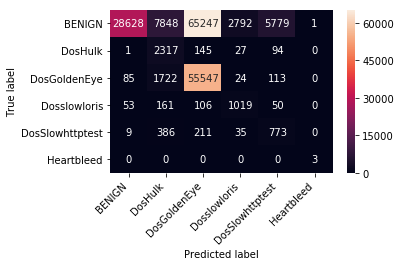

PRECISION SCORE: 
0.932151745723
RECALL SCORE: 
0.932151745723
F1 score: 
0.932151745723


In [25]:
from sklearn.naive_bayes import GaussianNB 

tic = timeit.default_timer()
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
toc = timeit.default_timer()-tic
print("GaussianNB training time: ",toc)
print(gnb_predictions)  
# accuracy on X_test 
accuracy = gnb.score(X_test,y_test)
print(accuracy)
cm = confusion_matrix(y_test,gnb_predictions)
y_train_pred = cross_val_predict(gnb, X_scaled, y_train, cv=3)
better_cf = print_confusion_matrix(cm, class_names)

print("PRECISION SCORE: ")
print(precision_score(y_train, y_train_pred ,average='micro'))
print("RECALL SCORE: ")
print(recall_score(y_train, y_train_pred, average='micro')) 
print("F1 score: ")
print(f1_score(y_train, y_train_pred,average='micro'))

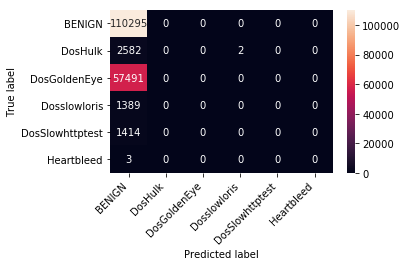

PRECISION SCORE: 
0.932151745723
RECALL SCORE: 
0.932151745723
F1 score: 
0.932151745723


In [26]:
#NB after scaling.

gnb = GaussianNB().fit(X_scaled, y_train)
gnb_predictions = gnb.predict(X_scaled_test)

cm = confusion_matrix(y_test,gnb_predictions)

better_cf = print_confusion_matrix(cm, class_names)

print("PRECISION SCORE: ")
print(precision_score(y_train, y_train_pred ,average='micro'))
print("RECALL SCORE: ")
print(recall_score(y_train, y_train_pred, average='micro')) 
print("F1 score: ")
print(f1_score(y_train, y_train_pred,average='micro'))

In [27]:
from sklearn import tree

In [28]:
classification_tree = tree.DecisionTreeClassifier()

In [30]:
tic = timeit.default_timer()
#gnb = GaussianNB().fit(X_train, y_train) 
#gnb_predictions = gnb.predict(X_test) 
classification_tree = classification_tree.fit(X_scaled, y_train)
toc = timeit.default_timer()-tic
print("GaussianNB training time: ",toc)


GaussianNB training time:  35.11216374428659


0.605811428835


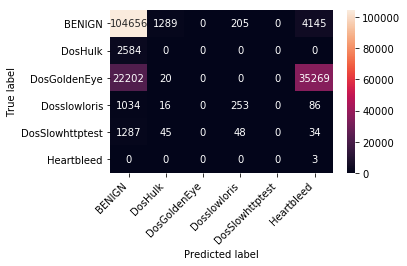

PRECISION SCORE: 
0.999439875117
RECALL SCORE: 
0.999439875117
F1 score: 
0.999439875117


In [33]:
accuracy = classification_tree.score(X_test,y_test)
print(accuracy)
tree_predictions = classification_tree.predict(X_test)
cm = confusion_matrix(y_test,tree_predictions)
y_train_pred = cross_val_predict(classification_tree, X_scaled, y_train, cv=3)
better_cf = print_confusion_matrix(cm, class_names)

print("PRECISION SCORE: ")
print(precision_score(y_train, y_train_pred ,average='micro'))
print("RECALL SCORE: ")
print(recall_score(y_train, y_train_pred, average='micro')) 
print("F1 score: ")
print(f1_score(y_train, y_train_pred,average='micro'))